# Understanding Digital Images with Python (cv2 + NumPy)

These tasks are designed to help you explore how digital images are represented and manipulated using NumPy arrays. Follow each step, execute the code, and write your observations. Try to reason about why each transformation works the way it does.

#### imports

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

#### 1. Load and View a Grayscale Image

Start by loading an image in grayscale and displaying it using matplotlib.

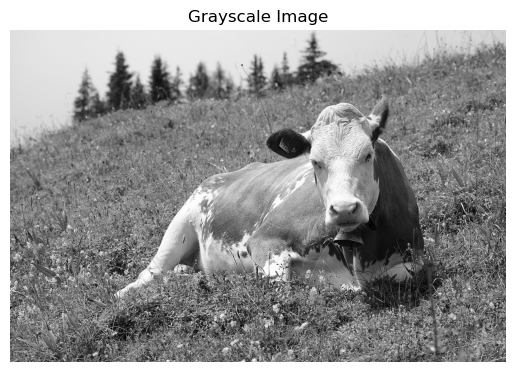

In [2]:
img = Image.open(r"C:\Users\bbuser\Desktop\Cow.jpg").convert('L')

# Display the grayscale image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

What does the array representation of the image look like?
What is the shape, data type, and pixel range?

In [3]:
img_array = np.array(img) # Convert to NumPy array

print("Array representation:\n", img_array)
print("Shape:", img_array.shape)
print("Data type:", img_array.dtype)
print("Pixel range:", img_array.min(), "to", img_array.max())

Array representation:
 [[222 222 222 ... 210 209 209]
 [222 222 222 ... 210 209 209]
 [222 222 222 ... 210 209 209]
 ...
 [ 63 147 192 ...  78  40  51]
 [127 136 193 ...  59  36  42]
 [134  69  54 ...  38  88  81]]
Shape: (803, 1200)
Data type: uint8
Pixel range: 0 to 255


#### 2. Brighten the Image

Try adding a fixed value (e.g., +50) to all pixel values of the grayscale image.

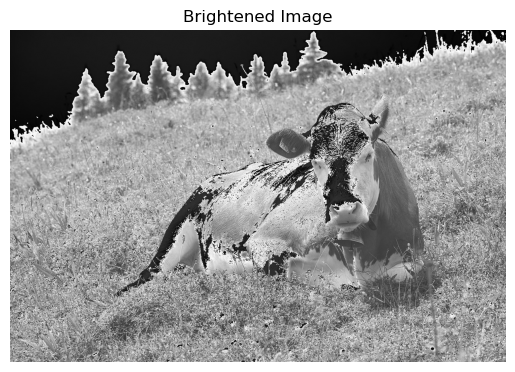

In [ ]:
img_array_brighten = np.array(img)
# Brighten by adding 50 
img_array_brighten = img_array_brighten + 50

# Show the brightened image
plt.imshow(img_array_brighten, cmap='gray')
plt.title("Brightened Image")
plt.axis('off')
plt.show()

How does the image change?
What happens if a pixel value exceeds 255?

<span style="color: mediumslateblue">_It is brighter, Pixel values must be between 0 and 255., If you add 50 to a pixel with value 220, the result would be 270 , which wont work._</span>

#### 3. Add a Higher Value

Now try adding a much higher value (e.g., +300) to the image.

In [9]:
img_array_brighten = img_array_brighten + 300 

OverflowError: Python integer 300 out of bounds for uint8

Do you get the result you expect? Can you explain what’s going wrong?

_OverflowError: Python integer 300 out of bounds for uint8_ 

pixel value exceeded 255

Try using np.clip() to keep values between 0 and 255.

In [14]:
img_array_brighten = np.clip(img_array_brighten + 255, 0, 255).astype(np.uint8)

#### 4. Subtract to Darken

Subtract a fixed value (e.g., -100) from the image.

What happens to the dark regions?

Are any values going below 0?

Use .clip(0, 255) to fix underflow and observe the difference.